In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [2]:
DATASET_LINK = 'https://files..grouplens.org/datasets/movielens/ml-100k.zip'

In [3]:
!wget -nc https://files.grouplens.org/datasets/movielens/ml-100k.zip
!unzip -n ml-100k.zip

File ‘ml-100k.zip’ already there; not retrieving.

Archive:  ml-100k.zip


### Loading MovieLens dataset


#### u-info


In [4]:

overall_stats = pd.read_csv('ml-100k/u.info', header=None)
print("Details of users, items and ratings involved in the loaded movielens dataset: ",list(overall_stats[0]))

Details of users, items and ratings involved in the loaded movielens dataset:  ['943 users', '1682 items', '100000 ratings']


In [5]:
column_names1 = ['user id','movie id','rating','timestamp']
dataset = pd.read_csv('ml-100k/u.data', sep='\t',header=None,names=column_names1)
dataset.head() 


,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [6]:
len(dataset), max(dataset['movie id']),min(dataset['movie id'])

(100000, 1682, 1)

In [7]:
d = 'movie id | movie title | release date | video release date | IMDb URL | unknown | Action | Adventure | Animation | Children | Comedy | Crime | Documentary | Drama | Fantasy | Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi | Thriller | War | Western'
column_names2 = d.split(' | ')
column_names2

['movie id',
 'movie title',
 'release date',
 'video release date',
 'IMDb URL',
 'unknown',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [8]:
items_dataset = pd.read_csv("ml-100k/u.item" , sep='|', header=None, names=column_names2, encoding='latin-1')
items_dataset

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
movie_dataset = items_dataset[['movie id', 'movie title']]

In [10]:
movie_dataset.head(10)

,movie id,movie title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...
6,7,Twelve Monkeys (1995)
7,8,Babe (1995)
8,9,Dead Man Walking (1995)
9,10,Richard III (1995)


In [11]:
#length of original items_dataset and length of unique combination of rows in items_dataset after removing movie id column
len(items_dataset.groupby(by=column_names2[1:])),len(items_dataset)

(1664, 1682)

### Merging required datasets


In [12]:
merged_dataset = pd.merge(dataset, movie_dataset, on='movie id', how='left')
merged_dataset.head() 
# A dataset is created by grouping unique user id and movie title combination 

,user id,movie id,rating,timestamp,movie title
0,196,242,3,881250949,Kolya (1996)
1,186,302,3,891717742,L.A. Confidential (1997)
2,22,377,1,878887116,Heavyweights (1994)
3,244,51,2,880606923,Legends of the Fall (1994)
4,166,346,1,886397596,Jackie Brown (1997)


In [13]:
merged_dataset[(merged_dataset['movie title'] == 'Chasing Amy (1997)') & (merged_dataset['user id'] == 894)] ## The user 894 watched the movie Chasing Amy (1997) is taken as an example to find similar users


,user id,movie id,rating,timestamp,movie title
62716,894,246,4,882404137,Chasing Amy (1997)
90596,894,268,3,879896041,Chasing Amy (1997)


In [14]:
refined_dataset = merged_dataset.groupby(by=['user id','movie title'], as_index=False).agg({"rating":"mean"})

refined_dataset.head()

,user id,movie title,rating
0,1,101 Dalmatians (1996),2.0
1,1,12 Angry Men (1957),5.0
2,1,"20,000 Leagues Under the Sea (1954)",3.0
3,1,2001: A Space Odyssey (1968),4.0
4,1,"Abyss, The (1989)",3.0


### EDA


In [15]:
num_users = len(refined_dataset['user id'].value_counts())
num_items = len(refined_dataset['movie title'].value_counts())
print('Unique number of users in the dataset: {}'.format(num_users))
print('Unique number of movies in the dataset: {}'.format(num_items))

Unique number of users in the dataset: 943
Unique number of movies in the dataset: 1664


In [16]:
rating_count_df = pd.DataFrame(refined_dataset.groupby(['rating']).size(), columns=['count'])
rating_count_df

,count
rating,
1.0,6083
1.5,3
2.0,11334
2.5,6
3.0,27060
3.5,19
4.0,34042
4.5,16
5.0,21130


Text(0, 0.5, 'number of ratings')

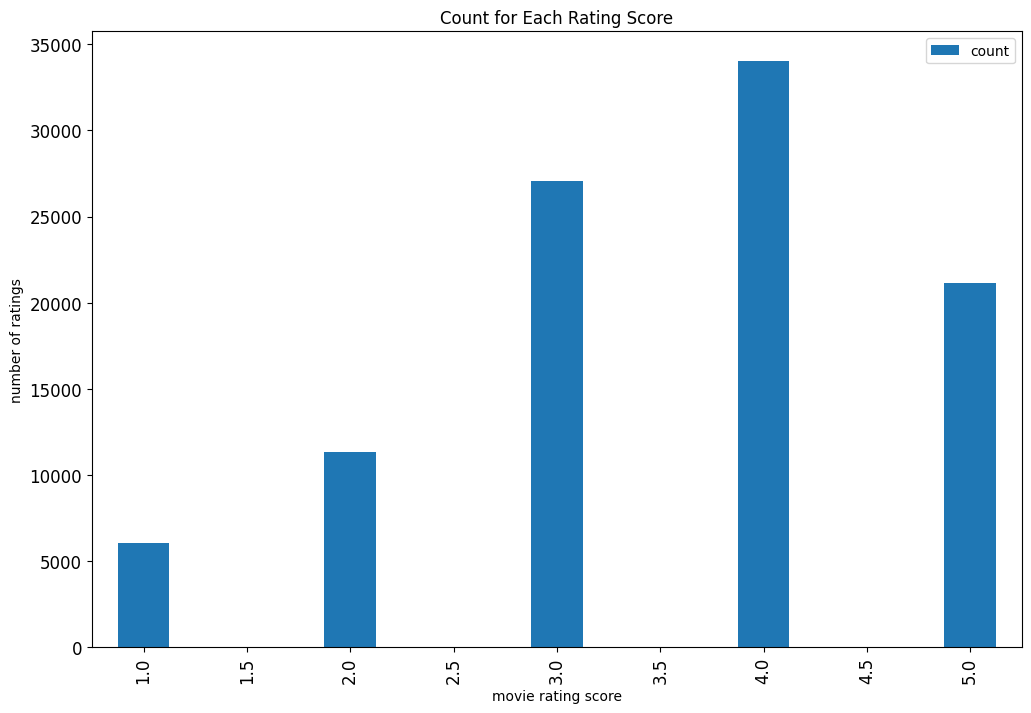

In [17]:
ax = rating_count_df.reset_index().rename(columns={'index': 'rating score'}).plot('rating','count', 'bar',
    figsize=(12, 8),
    title='Count for Each Rating Score',
    fontsize=12)

ax.set_xlabel("movie rating score")
ax.set_ylabel("number of ratings")

In [18]:
total_count = num_items * num_users
zero_count = total_count-refined_dataset.shape[0]
zero_count

1469459

In [19]:
rating_count_df = pd.concat([rating_count_df, 
                             pd.DataFrame({'count': zero_count}, index=[0.0])], 
                            verify_integrity=True).sort_index()
rating_count_df

,count
0.0,1469459
1.0,6083
1.5,3
2.0,11334
2.5,6
3.0,27060
3.5,19
4.0,34042
4.5,16
5.0,21130


In [20]:
#Log count 
rating_count_df['log_count'] = np.log(rating_count_df['count'])
rating_count_df

,count,log_count
0.0,1469459,14.200405
1.0,6083,8.713253
1.5,3,1.098612
2.0,11334,9.335562
2.5,6,1.791759
3.0,27060,10.205812
3.5,19,2.944439
4.0,34042,10.435350
4.5,16,2.772589
5.0,21130,9.958449


In [21]:
rating_count_df = rating_count_df.reset_index().rename(columns={'index': 'rating score'})
rating_count_df

,rating score,count,log_count
0,0.0,1469459,14.200405
1,1.0,6083,8.713253
2,1.5,3,1.098612
3,2.0,11334,9.335562
4,2.5,6,1.791759
5,3.0,27060,10.205812
6,3.5,19,2.944439
7,4.0,34042,10.435350
8,4.5,16,2.772589
9,5.0,21130,9.958449


Text(0, 0.5, 'log number of ratings')

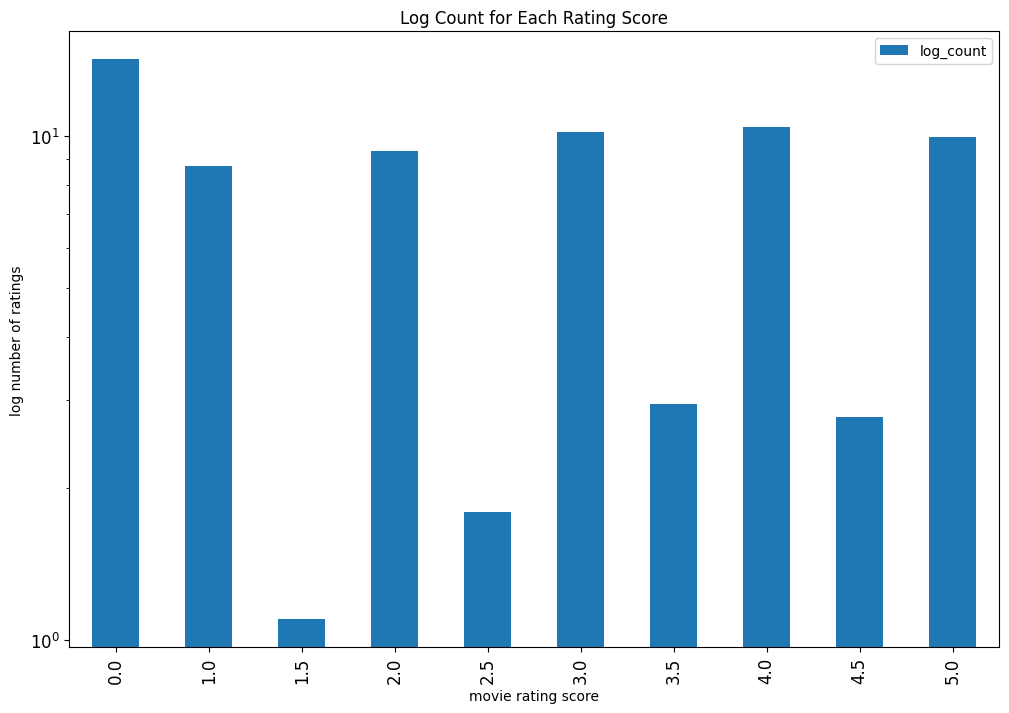

In [22]:
ax =   rating_count_df.plot('rating score', 'log_count', 'bar', figsize=(12, 8),
    title='Log Count for Each Rating Score',
    logy = True,
    fontsize=12)
ax.set_xlabel("movie rating score")
ax.set_ylabel("log number of ratings")

** Plot rating frequency of all movies **


In [23]:
refined_dataset.head(10)

,user id,movie title,rating
0,1,101 Dalmatians (1996),2.0
1,1,12 Angry Men (1957),5.0
2,1,"20,000 Leagues Under the Sea (1954)",3.0
3,1,2001: A Space Odyssey (1968),4.0
4,1,"Abyss, The (1989)",3.0
5,1,Ace Ventura: Pet Detective (1994),3.0
6,1,Air Bud (1997),1.0
7,1,Akira (1988),4.0
8,1,Aladdin (1992),4.0
9,1,Alien (1979),5.0


In [24]:
# get rating frequency
movies_count_df = pd.DataFrame(refined_dataset.groupby('movie title').size(), columns=['count'])
movies_count_df.head()

,count
movie title,
'Til There Was You (1997),9
1-900 (1994),5
101 Dalmatians (1996),109
12 Angry Men (1957),125
187 (1997),41


Text(0, 0.5, 'number of ratings')

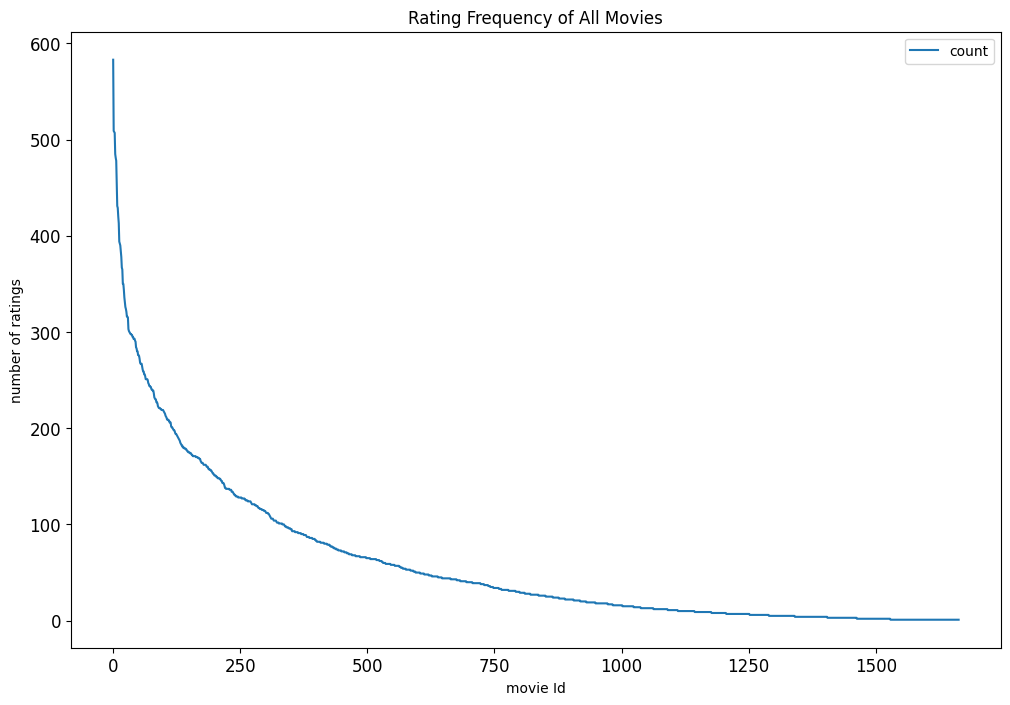

In [25]:
# Plot rate frequency of all movies
ax = movies_count_df \
    .sort_values('count', ascending=False) \
    .reset_index(drop=True) \
    .plot(
        figsize=(12, 8),
        title='Rating Frequency of All Movies',
        fontsize=12
    )
ax.set_xlabel("movie Id")
ax.set_ylabel("number of ratings")

Since the dataset is small we donot see long tail property in the distributions of ratings , and we do not care about the movies with less number of ratings.


## Training KNN model to build a item-based recommendation system


### Movie Recommendation using KNN with Input as User id, Number of similar users should the model pick and Number of movies you want to get recommended:


In [26]:
# Reshaping the dataset so we want the data to be [movies, users] array if movie is the subject where similar movies must be found and [users, movies] array for reverse by pivoting the dataset
# Pivot and creating movie-user matrix
user_to_movie_df =  refined_dataset.pivot(index='user id', columns='movie title', values='rating').fillna(0)
user_to_movie_df.head()

movie title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,2.0,5.0,0.0,0.0,3.0,4.0,0.0,0.0,...,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0


In [27]:
#Transform matrix to scipy sparse matrix
user_to_movie_sparse = csr_matrix(user_to_movie_df.values)
user_to_movie_sparse

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 99693 stored elements and shape (943, 1664)>

In [28]:
#Fitting KNN model to sparse matrix
knn_model = NearestNeighbors(metric='cosine', algorithm='brute')
knn_model.fit(user_to_movie_sparse)

,n_neighbors,5
,radius,1.0
,algorithm,'brute'
,leaf_size,30
,metric,'cosine'
,p,2
,metric_params,None
,n_jobs,None


In [29]:
## Function to find top n similar users of a given user
def get_similar_users(user, n=5):
  ## input to this function is the user and number of top similar users you want.

  knn_input = np.asarray([user_to_movie_df.values[user-1]])  #.reshape(1,-1)
  # knn_input = user_to_movie_df.iloc[0,:].values.reshape(1,-1)
  distances, indices = knn_model.kneighbors(knn_input, n_neighbors=n+1)
  
  print("Top",n,"users who are very much similar to the User-",user, "are: ")
  print(" ")
  for i in range(1,len(distances[0])):
    print(i,". User:", indices[0][i]+1, "separated by distance of",distances[0][i])
  return indices.flatten()[1:] + 1, distances.flatten()[1:]

In [30]:
#Specify user id and number of similar users you want
from pprint import pprint
user_id = 23  # User id of the input user
print(" Few of movies seen by the User:")
pprint(list(refined_dataset[refined_dataset['user id'] == user_id]['movie title'])[:10])
similar_user_list, distance_list = get_similar_users(user_id,5)

 Few of movies seen by the User:
['Addams Family Values (1993)',
 'Age of Innocence, The (1993)',
 'Aladdin (1992)',
 'Alien (1979)',
 'Aliens (1986)',
 'Amadeus (1984)',
 "Antonia's Line (1995)",
 'Apollo 13 (1995)',
 'Apt Pupil (1998)',
 'Aristocats, The (1970)']
Top 5 users who are very much similar to the User- 23 are: 
 
1 . User: 407 separated by distance of 0.4949812764242756
2 . User: 913 separated by distance of 0.5148199694096764
3 . User: 738 separated by distance of 0.5173424409192611
4 . User: 62 separated by distance of 0.5197529454991165
5 . User: 815 separated by distance of 0.523617166384079


By this model we will get the similar users of dersired number.


In [31]:
# To pick the top movies to recommend
similar_user_list, distance_list 

(array([407, 913, 738,  62, 815]),
 array([0.49498128, 0.51481997, 0.51734244, 0.51975295, 0.52361717]))

In [32]:
weightage_list = distance_list/np.sum(distance_list)
weightage_list

array([0.19256122, 0.20027901, 0.20126032, 0.20219808, 0.20370136])

In [33]:
mov_rtngs_sim_users = user_to_movie_df.values[similar_user_list] # Getting rating for all movies of similar users
mov_rtngs_sim_users  

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 2., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(5, 1664))

In [34]:
movies_list = user_to_movie_df.columns
movies_list

Index([''Til There Was You (1997)', '1-900 (1994)', '101 Dalmatians (1996)',
       '12 Angry Men (1957)', '187 (1997)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '3 Ninjas: High Noon At Mega Mountain (1998)', '39 Steps, The (1935)',
       ...
       'Yankee Zulu (1994)', 'Year of the Horse (1997)', 'You So Crazy (1994)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Poisoner's Handbook, The (1995)',
       'Zeus and Roxanne (1997)', 'unknown',
       'Á köldum klaka (Cold Fever) (1994)'],
      dtype='object', name='movie title', length=1664)

In [35]:
print("Weightage list shape:", len(weightage_list))
print("mov_rtngs_sim_users shape:", mov_rtngs_sim_users.shape)
print("Number of movies:", len(movies_list))

Weightage list shape: 5
mov_rtngs_sim_users shape: (5, 1664)
Number of movies: 1664


In [36]:
weightage_list = weightage_list[:,np.newaxis] + np.zeros(len(movies_list)) #Broadcasting weightage matrix to similar user rating matrix.
# so that it gets compatible for matrix operations
weightage_list.shape 

(5, 1664)

In [37]:
new_rating_matrix = weightage_list*mov_rtngs_sim_users
mean_rating_list = new_rating_matrix.sum(axis =0)
mean_rating_list

array([0.        , 0.        , 0.40439615, ..., 0.        , 0.        ,
       0.        ], shape=(1664,))

In [38]:
from pprint import pprint
def recommend_movies(n):
  n = min(len(mean_rating_list),n)
  # print(np.argsort(mean_rating_list)[::-1][:n])
  pprint(list(movies_list[np.argsort(mean_rating_list)[::-1][:n]]))


In [39]:
print("Movies recommended based on similar users are: ")
recommend_movies(10)

Movies recommended based on similar users are: 
['Scream (1996)',
 'Titanic (1997)',
 'Liar Liar (1997)',
 'Air Force One (1997)',
 'Fargo (1996)',
 'In & Out (1997)',
 'Cop Land (1997)',
 'Contact (1997)',
 'English Patient, The (1996)',
 'Saint, The (1997)']


In [40]:
def filtered_movie_recommendations(n):  # Removes the movies already seen by uer and recommends movies which are not seen by similar users
  
  first_zero_index = np.where(mean_rating_list == 0)[0][-1]
  sortd_index = np.argsort(mean_rating_list)[::-1]
  sortd_index = sortd_index[:list(sortd_index).index(first_zero_index)]
  n = min(len(sortd_index),n)
  movies_watched = list(refined_dataset[refined_dataset['user id'] == user_id]['movie title'])
  filtered_movie_list = list(movies_list[sortd_index])
  count = 0
  final_movie_list = []
  for i in filtered_movie_list:
    if i not in movies_watched:
      count+=1
      final_movie_list.append(i)
    if count == n:
      break
  if count == 0:
    print("There are no movies left which are not seen by the input users and seen by similar users. May be increasing the number of similar users who are to be considered may give a chance of suggesting an unseen good movie.")
  else:
    pprint(final_movie_list)


In [41]:
filtered_movie_recommendations(10)


['Scream (1996)',
 'Titanic (1997)',
 'Air Force One (1997)',
 'In & Out (1997)',
 'Cop Land (1997)',
 'English Patient, The (1996)',
 'Saint, The (1997)',
 'Game, The (1997)',
 'Conspiracy Theory (1997)',
 'L.A. Confidential (1997)']


Building main function


In [42]:
from pprint import pprint

def recommender_system(user_id, n_similar_users, n_movies): #, user_to_movie_df, knn_model):
  
  print("Movie seen by the User:")
  pprint(list(refined_dataset[refined_dataset['user id'] == user_id]['movie title']))
  print("")

  # def get_similar_users(user, user_to_movie_df, knn_model, n = 5):
  def get_similar_users(user, n = 5):
    
    knn_input = np.asarray([user_to_movie_df.values[user-1]])
    
    distances, indices = knn_model.kneighbors(knn_input, n_neighbors=n+1)
    
    print("Top",n,"users who are very much similar to the User-",user, "are: ")
    print(" ")

    for i in range(1,len(distances[0])):
      print(i,". User:", indices[0][i]+1, "separated by distance of",distances[0][i])
    print("")
    return indices.flatten()[1:] + 1, distances.flatten()[1:]


  def filtered_movie_recommendations(n = 10):
  
    first_zero_index = np.where(mean_rating_list == 0)[0][-1]
    sortd_index = np.argsort(mean_rating_list)[::-1]
    sortd_index = sortd_index[:list(sortd_index).index(first_zero_index)]
    n = min(len(sortd_index),n)
    movies_watched = list(refined_dataset[refined_dataset['user id'] == user_id]['movie title'])
    filtered_movie_list = list(movies_list[sortd_index])
    count = 0
    final_movie_list = []
    for i in filtered_movie_list:
      if i not in movies_watched:
        count+=1
        final_movie_list.append(i)
      if count == n:
        break
    if count == 0:
      print("There are no movies left which are not seen by the input users and seen by similar users. May be increasing the number of similar users who are to be considered may give a chance of suggesting an unseen good movie.")
    else:
      pprint(final_movie_list)

  similar_user_list, distance_list = get_similar_users(user_id,n_similar_users)
  weightage_list = distance_list/np.sum(distance_list)
  mov_rtngs_sim_users = user_to_movie_df.values[similar_user_list]
  movies_list = user_to_movie_df.columns
  weightage_list = weightage_list[:,np.newaxis] + np.zeros(len(movies_list))
  new_rating_matrix = weightage_list*mov_rtngs_sim_users
  mean_rating_list = new_rating_matrix.sum(axis =0)
  print("")
  print("Movies recommended based on similar users are: ")
  print("")
  filtered_movie_recommendations(n_movies)

In [43]:
print("Enter user id")
user_id= int(input())
print("number of similar users to be considered")
sim_users = int(input())
print("Enter number of movies to be recommended:")
n_movies = int(input())
recommender_system(user_id,sim_users,n_movies)

Enter user id
number of similar users to be considered
Enter number of movies to be recommended:
Movie seen by the User:
['3 Ninjas: High Noon At Mega Mountain (1998)',
 'Absolute Power (1997)',
 'Air Force One (1997)',
 "Antonia's Line (1995)",
 'Apt Pupil (1998)',
 'As Good As It Gets (1997)',
 'Bed of Roses (1996)',
 'Birdcage, The (1996)',
 'Breakdown (1997)',
 'Contact (1997)',
 'Deceiver (1997)',
 "Devil's Advocate, The (1997)",
 'Donnie Brasco (1997)',
 'Emma (1996)',
 'English Patient, The (1996)',
 'Evita (1996)',
 'Face/Off (1997)',
 'FairyTale: A True Story (1997)',
 'Fargo (1996)',
 'Fierce Creatures (1997)',
 'Fly Away Home (1996)',
 'Full Monty, The (1997)',
 'Godfather, The (1972)',
 'Good Will Hunting (1997)',
 'Heat (1995)',
 'Hoodlum (1997)',
 'Ice Storm, The (1997)',
 'In & Out (1997)',
 'Jerry Maguire (1996)',
 'Kolya (1996)',
 'L.A. Confidential (1997)',
 'Leaving Las Vegas (1995)',
 'Liar Liar (1997)',
 "Marvin's Room (1996)",
 'Men in Black (1997)',
 'Midnight in

## Rec system with input as "Movie Name" and number of movies you want to get recommended

In [44]:
# Reshaping model in such a way that each movie has n-dimensional rating space where n is total number of users who could rate.
# pivot and create movie-user matrix
movie_to_user_df = refined_dataset.pivot( 
     index='movie title',
   columns='user id',
      values='rating').fillna(0)

movie_to_user_df.head()

user id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
movie title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1-900 (1994),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101 Dalmatians (1996),2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0
12 Angry Men (1957),5.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
187 (1997),0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
# transform matrix to scipy sparse matrix
movie_to_user_sparse_df = csr_matrix(movie_to_user_df.values)
movie_to_user_sparse_df

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 99693 stored elements and shape (1664, 943)>

In [46]:
# Exatracting movie names into a list
movies_list = list(movie_to_user_df.index)
movies_list[:10]

["'Til There Was You (1997)",
 '1-900 (1994)',
 '101 Dalmatians (1996)',
 '12 Angry Men (1957)',
 '187 (1997)',
 '2 Days in the Valley (1996)',
 '20,000 Leagues Under the Sea (1954)',
 '2001: A Space Odyssey (1968)',
 '3 Ninjas: High Noon At Mega Mountain (1998)',
 '39 Steps, The (1935)']

In [47]:
# Creating a dictionary to map user id to index
movie_dict = {movie : index for index, movie in enumerate(movies_list)}
print(movie_dict)

{"'Til There Was You (1997)": 0, '1-900 (1994)': 1, '101 Dalmatians (1996)': 2, '12 Angry Men (1957)': 3, '187 (1997)': 4, '2 Days in the Valley (1996)': 5, '20,000 Leagues Under the Sea (1954)': 6, '2001: A Space Odyssey (1968)': 7, '3 Ninjas: High Noon At Mega Mountain (1998)': 8, '39 Steps, The (1935)': 9, '8 1/2 (1963)': 10, '8 Heads in a Duffel Bag (1997)': 11, '8 Seconds (1994)': 12, 'A Chef in Love (1996)': 13, 'Above the Rim (1994)': 14, 'Absolute Power (1997)': 15, 'Abyss, The (1989)': 16, 'Ace Ventura: Pet Detective (1994)': 17, 'Ace Ventura: When Nature Calls (1995)': 18, 'Across the Sea of Time (1995)': 19, 'Addams Family Values (1993)': 20, 'Addicted to Love (1997)': 21, 'Addiction, The (1995)': 22, 'Adventures of Pinocchio, The (1996)': 23, 'Adventures of Priscilla, Queen of the Desert, The (1994)': 24, 'Adventures of Robin Hood, The (1938)': 25, 'Affair to Remember, An (1957)': 26, 'African Queen, The (1951)': 27, 'Afterglow (1997)': 28, 'Age of Innocence, The (1993)': 2

In [48]:
case_insensitive_movies_list = [i.lower() for i in movies_list]

In [49]:
# Fitting a KNN model 
knn_movie_model = NearestNeighbors(metric='cosine', algorithm='brute')
knn_movie_model.fit(movie_to_user_sparse_df)

,n_neighbors,5
,radius,1.0
,algorithm,'brute'
,leaf_size,30
,metric,'cosine'
,p,2
,metric_params,None
,n_jobs,None


In [50]:
NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

,n_neighbors,5
,radius,1.0
,algorithm,'brute'
,leaf_size,30
,metric,'cosine'
,p,2
,metric_params,None
,n_jobs,None


In [51]:
## function to find top n similar users of the given input user 
def get_similar_movies(movie, n = 10):
  ## input to this function is the movie and number of top similar movies you want.
  index = movie_dict[movie]
  knn_input = np.asarray([movie_to_user_df.values[index]])
  n = min(len(movies_list)-1,n)
  distances, indices = knn_movie_model.kneighbors(knn_input, n_neighbors=n+1)
  
  print("Top",n,"movies which are very much similar to the Movie-",movie, "are: ")
  print(" ")
  for i in range(1,len(distances[0])):
    print(movies_list[indices[0][i]])
  

In [52]:
# Test 
from pprint import pprint
movie_name = '101 Dalmatians (1996)'

get_similar_movies(movie_name,15)

Top 15 movies which are very much similar to the Movie- 101 Dalmatians (1996) are: 
 
Jack (1996)
Twister (1996)
Willy Wonka and the Chocolate Factory (1971)
Independence Day (ID4) (1996)
Toy Story (1995)
Father of the Bride Part II (1995)
Hunchback of Notre Dame, The (1996)
Lion King, The (1994)
Mrs. Doubtfire (1993)
Jungle Book, The (1994)
Grumpier Old Men (1995)
Mission: Impossible (1996)
Mr. Holland's Opus (1995)
Homeward Bound II: Lost in San Francisco (1996)
Dragonheart (1996)


In [53]:
# function which takes input and returns suggestions for the user
#provides user with movie name suggestions if movie name is mis-spelled or Recommends similar movies to the input movie if the movie name is valid.
def get_possible_movies(movie):

    temp = ''
    possible_movies = case_insensitive_movies_list.copy()
    for i in movie :
      out = []
      temp += i
      for j in possible_movies:
        if temp in j:
          out.append(j)
      if len(out) == 0:
          return possible_movies
      out.sort()
      possible_movies = out.copy()

    return possible_movies
     

In [54]:
class invalid(Exception):
    pass

def spell_correction():
    
    try:

      movie_name = input("Enter the Movie name: ")
      movie_name_lower = movie_name.lower()
      if movie_name_lower not in case_insensitive_movies_list :
        raise invalid
      else :
        # movies_list[case_insensitive_country_names.index(movie_name_lower)]
        num_recom = int(input("Enter Number of movie recommendations needed: "))
        get_similar_movies(movies_list[case_insensitive_movies_list.index(movie_name_lower)],num_recom)

    except invalid:

      possible_movies = get_possible_movies(movie_name_lower)

      if len(possible_movies) == len(movies_list) :
        print("Movie name entered is does not exist in the list ")
      else :
        indices = [case_insensitive_movies_list.index(i) for i in possible_movies]
        print("Entered Movie name is not matching with any movie from the dataset . Please check the below suggestions :\n",[movies_list[i] for i in indices])
        spell_correction()


In [55]:
spell_correction() # Test

Entered Movie name is not matching with any movie from the dataset . Please check the below suggestions :
 ['Back to the Future (1985)', 'Backbeat (1993)', 'Best of the Best 3: No Turning Back (1995)', 'Empire Strikes Back, The (1980)', 'Hunchback of Notre Dame, The (1996)', 'Switchback (1997)']
Entered Movie name is not matching with any movie from the dataset . Please check the below suggestions :
 ['Empire Strikes Back, The (1980)']
Top 15 movies which are very much similar to the Movie- Empire Strikes Back, The (1980) are: 
 
Raiders of the Lost Ark (1981)
Indiana Jones and the Last Crusade (1989)
Back to the Future (1985)
Star Wars (1977)
Terminator, The (1984)
Return of the Jedi (1983)
Terminator 2: Judgment Day (1991)
Princess Bride, The (1987)
Jurassic Park (1993)
Fugitive, The (1993)
Silence of the Lambs, The (1991)
E.T. the Extra-Terrestrial (1982)
Star Trek: The Wrath of Khan (1982)
Alien (1979)
Blade Runner (1982)


In [56]:
# calcuate total number of entries in the movie-user matrix
num_entries = movie_to_user_df.shape[0] * movie_to_user_df.shape[1]
# calculate total number of entries with zero values
num_zeros = (movie_to_user_df==0).sum(axis=1).sum()
# calculate ratio of number of zeros to number of entries
ratio_zeros = num_zeros / num_entries
print('There is about {:.2%} of ratings in our data is missing'.format(ratio_zeros))

There is about 93.65% of ratings in our data is missing


This is because mast majority of our matrix is zero . Hence the result.